# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Watermark" data-toc-modified-id="Watermark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Watermark</a></div><div class="lev1 toc-item"><a href="#Imports-and-Setups" data-toc-modified-id="Imports-and-Setups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Setups</a></div><div class="lev3 toc-item"><a href="#Autoimport-my-code" data-toc-modified-id="Autoimport-my-code-201"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Autoimport my code</a></div><div class="lev3 toc-item"><a href="#Plotting" data-toc-modified-id="Plotting-202"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Plotting</a></div><div class="lev1 toc-item"><a href="#MEME" data-toc-modified-id="MEME-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MEME</a></div><div class="lev2 toc-item"><a href="#Overlap-between-eCLIP-and-FIMO" data-toc-modified-id="Overlap-between-eCLIP-and-FIMO-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Overlap between eCLIP and FIMO</a></div><div class="lev2 toc-item"><a href="#p-value-threshold" data-toc-modified-id="p-value-threshold-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>p-value threshold</a></div><div class="lev2 toc-item"><a href="#motif-regions" data-toc-modified-id="motif-regions-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>motif regions</a></div><div class="lev2 toc-item"><a href="#kmer-differences" data-toc-modified-id="kmer-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>kmer differences</a></div><div class="lev2 toc-item"><a href="#Build-class" data-toc-modified-id="Build-class-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Build class</a></div><div class="lev2 toc-item"><a href="#cisbp-to-meme" data-toc-modified-id="cisbp-to-meme-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>cisbp to meme</a></div><div class="lev2 toc-item"><a href="#All-proteins" data-toc-modified-id="All-proteins-37"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>All proteins</a></div><div class="lev3 toc-item"><a href="#Cleanup" data-toc-modified-id="Cleanup-371"><span class="toc-item-num">3.7.1&nbsp;&nbsp;</span>Cleanup</a></div><div class="lev1 toc-item"><a href="#Mauro-grant" data-toc-modified-id="Mauro-grant-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mauro grant</a></div><div class="lev1 toc-item"><a href="#Polysomes" data-toc-modified-id="Polysomes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Polysomes</a></div><div class="lev2 toc-item"><a href="#Without-filtering" data-toc-modified-id="Without-filtering-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Without filtering</a></div><div class="lev1 toc-item"><a href="#Random-seqs" data-toc-modified-id="Random-seqs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Random seqs</a></div>

# Watermark

In [1]:
%load_ext watermark
%watermark -a 'Jessime Kirk' -nmv --packages numpy,scipy,pandas,sklearn,matplotlib,seaborn,networkx,notebook,jupyter_contrib_nbextensions

Jessime Kirk Sun Dec 31 2017 

CPython 3.6.3
IPython 6.2.1

numpy 1.13.3
scipy 1.0.0
pandas 0.21.0
sklearn 0.19.1
matplotlib 2.1.0
seaborn 0.8.1
networkx 2.0
notebook 5.2.2
jupyter_contrib_nbextensions 0.2.8

compiler   : GCC 7.2.0
system     : Linux
release    : 4.10.0-42-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Imports and Setups

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from tqdm import tqdm, trange, tqdm_notebook, tnrange

from scipy.stats import describe
from scipy.stats import ks_2samp
from scipy.stats import chisquare

from itertools import product

import os
import subprocess as sp

from pprint import pprint

from math import ceil

### Autoimport my code

In [2]:
pwd

'/home/jessime/Code/kmers3/Notebooks'

In [3]:
cd ..

/home/jessime/Code/kmers3


In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

### Plotting

In [6]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['legend.fontsize'] = 22
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# MEME

I accidentally grabbed the wrong pwm in the last few cells for the Nov. notebook. The new motif has a length of 11, so let's see what that looks like in the eCLIP data.

In [22]:
%aimport fasta

In [23]:
infasta = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/IGF2BP1.fa'
maker = fasta.Maker(infasta)
eclip_11mers = pd.DataFrame([list(s) for s in maker.seqs if len(s) == 11])
eclip_11mers_pwm = pd.DataFrame([c.value_counts() for i, c in eclip_11mers.iteritems()]).T
eclip_11mers_pwm /= eclip_11mers_pwm.sum()
eclip_11mers_pwm

0         1         2         3         4         5         6   \
A  0.215247  0.214455  0.232129  0.219203  0.228172  0.228436  0.226326   
C  0.253231  0.263519  0.259826  0.275653  0.263783  0.266157  0.280665   
G  0.325508  0.280401  0.276972  0.273543  0.276180  0.291216  0.287787   
T  0.206014  0.241625  0.231074  0.231601  0.231865  0.214192  0.205223   

         7         8         9         10  
A  0.227381  0.247692  0.266684  0.223424  
C  0.279082  0.275389  0.241625  0.225534  
G  0.277763  0.274334  0.300185  0.353996  
T  0.215774  0.202585  0.191506  0.197046

Yea, it's not going to be that simple, it looks like.

I wonder what motifs MEME finds de novo:

In [30]:
!meme -oc /home/jessime/Research/proteins/eCLIP/IGF2BP1/meme/\
 /home/jessime/Research/proteins/eCLIP/IGF2BP1/IGF2BP1_head.fa

The output directory '/home/jessime/Research/proteins/eCLIP/IGF2BP1/meme/' already exists.
Its contents will be overwritten.
All sequences must be at least 8 characters long.  Set -w or -minw or remove shorter sequences
and rerun.


In [34]:
infasta = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/IGF2BP1_head.fa'
outfasta = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/IGF2BP1_head2.fa'
maker = fasta.Maker(infasta, outfasta)

#I don't feel like fixing all the issues with `filter_size` right now.
data = [(h, s) for h,s in maker.data if len(s) >=11]

with open(outfasta, 'w') as outfasta:
    for h, s in data:
        outfasta.write(h+'\n')
        outfasta.write(s+'\n')

In [35]:
!meme -oc /home/jessime/Research/proteins/eCLIP/IGF2BP1/meme/\
 /home/jessime/Research/proteins/eCLIP/IGF2BP1/IGF2BP1_head2.fa

The output directory '/home/jessime/Research/proteins/eCLIP/IGF2BP1/meme/' already exists.
Its contents will be overwritten.
Initializing the motif probability tables for 2 to 1251 sites...
nsites = 1251
Done initializing.
SEEDS: highwater mark: seq 1250 pos 36

seqs=  1251, min=  11, max=  247, total=    62975

motif=1
SEED WIDTHS: 8 11 15 21 29 41 50
em: w=  50, psites= 512, iter=  30     


In [36]:
!meme -w 11 -nmotifs 10\
 -oc /home/jessime/Research/proteins/eCLIP/IGF2BP1/meme11/\
 /home/jessime/Research/proteins/eCLIP/IGF2BP1/IGF2BP1_head2.fa

Writing results to output directory '/home/jessime/Research/proteins/eCLIP/IGF2BP1/meme11/'.
w set, setting max and min widths to 11
Initializing the motif probability tables for 2 to 1251 sites...
nsites = 1251
Done initializing.
SEEDS: highwater mark: seq 1250 pos 36

seqs=  1251, min=  11, max=  247, total=    62975

motif=1
SEED WIDTHS: 11
em: w=  11, psites=1251, iter=   0     
motif=2
SEED WIDTHS: 11
em: w=  11, psites=1251, iter=   0     
motif=3
SEED WIDTHS: 11
em: w=  11, psites=1251, iter=   0     
motif=4
SEED WIDTHS: 11
em: w=  11, psites=1251, iter=   0     
motif=5
SEED WIDTHS: 11
em: w=  11, psites=1251, iter=   0     
motif=6
SEED WIDTHS: 11
em: w=  11, psites=1251, iter=   0     
motif=7
SEED WIDTHS: 11
em: w=  11, psites=1251, iter=   0     
motif=8
SEED WIDTHS: 11
em: w=  11, psites=1251, iter=   0     
motif=9
SEED WIDTHS: 11
em: w=  11, psites=1251, iter=   0     
motif=10
SEED WIDTHS: 11
em: w=  11, psites=1251, iter=   0     


In [40]:
!fimo --norc --thresh .01 --oc /home/jessime/Research/proteins/eCLIP/IGF2BP1/fimo/ \
~/Research/proteins/motifs/IGF2BP1_pwm_meme.txt ~/Research/v22_transcripts01.fa

Using motif +M296_0.6 of width 11.
Motif matches with p-value >= 0.0052 have been dropped to reclaim memory.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.994681


Let's make a random control based on IGF2BP2.

In [42]:
!fimo --norc --thresh .01 --oc /home/jessime/Research/proteins/eCLIP/IGF2BP1/fimo_control/ \
~/Research/proteins/motifs/control_meme.txt ~/Research/v22_transcripts01.fa

Using motif +M032_0.6 of width 11.
Motif matches with p-value >= 0.0043 have been dropped to reclaim memory.
Motif matches with p-value >= 0.0018 have been dropped to reclaim memory.
Computing q-values.
Estimating pi_0 from a uniformly sampled set of 10000 p-values.
Estimating pi_0.
Estimated pi_0=0.993807


## Overlap between eCLIP and FIMO

The title pretty much says it all. For each predicted motif in fimo, I need to find if there is any overlap with an eCLIP binding site.

The first step is to get all the fimo regions into bed format.

In [111]:
fimo = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/fimo/fimo.txt'
fimo = pd.read_csv(fimo, sep='\t')
print(fimo.shape)
fimo.head()

(90119, 10)


# motif_id  motif_alt_id                                      sequence_name  \
0   M296_0.6           NaN  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...   
1   M296_0.6           NaN  ENST00000624418.1|ENSG00000280222.1|OTTHUMG000...   
2   M296_0.6           NaN  ENST00000435641.4|ENSG00000216863.8|OTTHUMG000...   
3   M296_0.6           NaN  ENST00000624429.1|ENSG00000279289.1|OTTHUMG000...   
4   M296_0.6           NaN  ENST00000623041.1|ENSG00000280180.1|OTTHUMG000...   

   start  stop strand    score       p-value  q-value matched_sequence  
0   1388  1398      +  20.5408  2.040000e-07        1      AAGCACCCGTT  
1    496   506      +  19.0102  4.010000e-07        1      AAGCACCCCTT  
2    596   606      +  19.0102  4.010000e-07        1      AAGCACCCCTT  
3   2217  2227      +  19.0102  4.010000e-07        1      AAGCACCCCTT  
4   3723  3733      +  19.0102  4.010000e-07        1      AAGCACCCCTT

Now I have to:

* extract the transcript id
* load in gencode lncRNA .gtf file
* grab chr names and start/stop positions
* add motif start/stop to chromosome start/stop

In [112]:
fimo['transcript'] = fimo['sequence_name'].apply(lambda s: s.split('|')[0])
fimo.head()

# motif_id  motif_alt_id                                      sequence_name  \
0   M296_0.6           NaN  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...   
1   M296_0.6           NaN  ENST00000624418.1|ENSG00000280222.1|OTTHUMG000...   
2   M296_0.6           NaN  ENST00000435641.4|ENSG00000216863.8|OTTHUMG000...   
3   M296_0.6           NaN  ENST00000624429.1|ENSG00000279289.1|OTTHUMG000...   
4   M296_0.6           NaN  ENST00000623041.1|ENSG00000280180.1|OTTHUMG000...   

   start  stop strand    score       p-value  q-value matched_sequence  \
0   1388  1398      +  20.5408  2.040000e-07        1      AAGCACCCGTT   
1    496   506      +  19.0102  4.010000e-07        1      AAGCACCCCTT   
2    596   606      +  19.0102  4.010000e-07        1      AAGCACCCCTT   
3   2217  2227      +  19.0102  4.010000e-07        1      AAGCACCCCTT   
4   3723  3733      +  19.0102  4.010000e-07        1      AAGCACCCCTT   

          transcript  
0  ENST00000588925.4  
1  ENST00000624418.1  
2  ENST00000435641.4  
3  ENST00000624429.1  
4  ENST00000623041.1

In [90]:
%aimport gtf

In [91]:
gencode_gtf = '/home/jessime/Research/gencode/gencode.v22.long_noncoding_RNAs.gtf'

gencode_gtf = gtf.Maker(gencode_gtf, skiprows=5)
gencode_gtf.inGTF.head()

seqname  source     feature  start    end score strand frame  \
0    chr1  HAVANA        gene  29554  31109     .      +     .   
1    chr1  HAVANA  transcript  29554  31097     .      +     .   
2    chr1  HAVANA        exon  29554  30039     .      +     .   
3    chr1  HAVANA        exon  30564  30667     .      +     .   
4    chr1  HAVANA        exon  30976  31097     .      +     .   

                                           attribute  
0  gene_id "ENSG00000243485.3"; gene_type "lincRN...  
1  gene_id "ENSG00000243485.3"; transcript_id "EN...  
2  gene_id "ENSG00000243485.3"; transcript_id "EN...  
3  gene_id "ENSG00000243485.3"; transcript_id "EN...  
4  gene_id "ENSG00000243485.3"; transcript_id "EN...

In [92]:
gencode_gtf.append_attribute(col=1, name='transcript')

In [93]:
gencode_gtf.expandedDF.head()

seqname  source     feature  start     end score strand frame  \
1     chr1  HAVANA  transcript  29554   31097     .      +     .   
5     chr1  HAVANA  transcript  30267   31109     .      +     .   
9     chr1  HAVANA  transcript  34554   36081     .      -     .   
13    chr1  HAVANA  transcript  35245   36073     .      -     .   
17    chr1  HAVANA  transcript  89295  120932     .      -     .   

                                            attribute         transcript  
1   gene_id "ENSG00000243485.3"; transcript_id "EN...  ENST00000473358.1  
5   gene_id "ENSG00000243485.3"; transcript_id "EN...  ENST00000469289.1  
9   gene_id "ENSG00000237613.2"; transcript_id "EN...  ENST00000417324.1  
13  gene_id "ENSG00000237613.2"; transcript_id "EN...  ENST00000461467.1  
17  gene_id "ENSG00000238009.5"; transcript_id "EN...  ENST00000466430.4

In [100]:
gencode_data = gencode_gtf.expandedDF[['seqname', 'start', 'end', 'strand', 'transcript']]
gencode_data = gencode_data.rename(columns={'start':'gene start', 'end':'gene end', 'strand':'gene strand'})
gencode_data.head()

seqname  gene start  gene end gene strand         transcript
1     chr1       29554     31097           +  ENST00000473358.1
5     chr1       30267     31109           +  ENST00000469289.1
9     chr1       34554     36081           -  ENST00000417324.1
13    chr1       35245     36073           -  ENST00000461467.1
17    chr1       89295    120932           -  ENST00000466430.4

In [113]:
print(fimo.shape)
fimo = pd.merge(fimo, gencode_data, on='transcript')
print(fimo.shape)
fimo = fimo.rename(columns={'start':'motif start', 'stop': 'motif end'})
fimo['start'] = fimo['gene start'] + fimo['motif start']
fimo['end'] = fimo['gene start'] + fimo['motif end']
fimo = fimo.drop(['# motif_id', 'motif_alt_id', 'score', 'q-value'], axis=1)
fimo.head()

(90119, 11)
(90119, 15)


sequence_name  motif start  motif end  \
0  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1388       1398   
1  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1683       1693   
2  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...          204        214   
3  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1360       1370   
4  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1793       1803   

  strand       p-value matched_sequence         transcript seqname  \
0      +  2.040000e-07      AAGCACCCGTT  ENST00000588925.4   chr18   
1      +  4.380000e-04      AAGGACCCCTG  ENST00000588925.4   chr18   
2      +  5.930000e-04      ATGCCCCCATT  ENST00000588925.4   chr18   
3      +  1.340000e-03      GGGCGCCCGCT  ENST00000588925.4   chr18   
4      +  1.440000e-03      AAGCAAGGCCT  ENST00000588925.4   chr18   

   gene start  gene end gene strand     start       end  
0    57639455  57738044           +  57640843  57640853  
1    57639455  57738044           +  57641138  57641148  
2    57639455  57738044           +  57639659  57639669  
3    57639455  57738044           +  57640815  57640825  
4    57639455  57738044           +  57641248  57641258

In [121]:
eclip_bed = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/IGF2BP1.bed'
eclip_bed = pd.read_table(eclip_bed, header=None)
eclip_bed = eclip_bed.rename(columns={0:'seqname', 1:'start', 2:'end', 5:'strand'})
eclip_bed.head()

seqname  start    end                    3    4 strand  \
0  chr14_GL000194v1_random  72395  72478  IGF2BP1_HepG2_rep01  200      -   
1  chr14_GL000194v1_random  60186  60264  IGF2BP1_HepG2_rep01  200      -   
2  chr14_GL000194v1_random  71950  71972  IGF2BP1_HepG2_rep01  200      -   
3  chr14_GL000194v1_random  73572  73726  IGF2BP1_HepG2_rep01  200      -   
4  chr14_GL000194v1_random  72556  72562  IGF2BP1_HepG2_rep01  200      -   

          6         7  8  9  
0  1.886399  2.078985 -1 -1  
1  1.556250  1.241046 -1 -1  
2  2.556250  1.104660 -1 -1  
3  0.996823  0.856579 -1 -1  
4  1.556250  0.711155 -1 -1

In [119]:
eclip_bed['seqname'].value_counts()

chr1                       39212
chr2                       31842
chr17                      27938
chr19                      24029
chr16                      23568
chr7                       23383
chr11                      23221
chr3                       22559
chr12                      21276
chr6                       21051
chr5                       17092
chr9                       16413
chr10                      15802
chr8                       14347
chr20                      13415
chr4                       13059
chr14                      12359
chr15                      12141
chr22                      11693
chrX                       10619
chr13                       6796
chr18                       5976
chr21                       4874
chrM                         513
chrY                         100
chr14_GL000194v1_random       51
chrUn_GL000219v1              15
chrUn_GL000218v1               6
chr14_GL000009v2_random        3
chrUn_GL000195v1               3
chr22_KI27

Okay, now we should be able to get the intersection count:

In [124]:
maker = gtf.Maker()
maker.inGTF = fimo
intersections = maker.intersection_count(eclip_bed)

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [129]:
intersections['Intersect'].value_counts()

0.0     88229
1.0      1242
2.0       455
3.0       115
4.0        70
5.0         4
7.0         2
6.0         1
10.0        1
Name: Intersect, dtype: int64

In [130]:
fimo2 = pd.concat((fimo, intersections), axis=1)
fimo2.head()

sequence_name  motif start  motif end  \
0  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1388       1398   
1  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1683       1693   
2  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...          204        214   
3  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1360       1370   
4  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1793       1803   

  strand       p-value matched_sequence         transcript seqname  \
0      +  2.040000e-07      AAGCACCCGTT  ENST00000588925.4   chr18   
1      +  4.380000e-04      AAGGACCCCTG  ENST00000588925.4   chr18   
2      +  5.930000e-04      ATGCCCCCATT  ENST00000588925.4   chr18   
3      +  1.340000e-03      GGGCGCCCGCT  ENST00000588925.4   chr18   
4      +  1.440000e-03      AAGCAAGGCCT  ENST00000588925.4   chr18   

   gene start  gene end gene strand     start       end  Intersect  
0    57639455  57738044           +  57640843  57640853        0.0  
1    57639455  57738044           +  57641138  57641148        0.0  
2    57639455  57738044           +  57639659  57639669        0.0  
3    57639455  57738044           +  57640815  57640825        0.0  
4    57639455  57738044           +  57641248  57641258        0.0

Let's poke around and do a little validation. Nothing too interesting below:

In [131]:
fimo2[fimo2['Intersect'] == 10.]

sequence_name  motif start  \
84232  ENST00000602755.1|ENSG00000270066.3|OTTHUMG000...          108   

       motif end strand  p-value matched_sequence         transcript seqname  \
84232        118      +  0.00389      GTGTGCGCGCT  ENST00000602755.1    chr1   

       gene start   gene end gene strand      start        end  Intersect  
84232   109100193  109100619           +  109100301  109100311       10.0

In [145]:
scarna2 = eclip_bed[(eclip_bed['seqname'] == 'chr1') & (eclip_bed['start'] > 109100193) & (eclip_bed['end'] < 109100619)].copy()
scarna2['length'] = scarna2['end'] - scarna2['start']
print(scarna2.shape)
scarna2.head()

(70, 11)


seqname      start        end                    3     4 strand  \
26191    chr1  109100315  109100319  IGF2BP1_HepG2_rep01  1000      +   
26192    chr1  109100309  109100315  IGF2BP1_HepG2_rep01  1000      +   
26193    chr1  109100304  109100309  IGF2BP1_HepG2_rep01  1000      +   
26194    chr1  109100299  109100304  IGF2BP1_HepG2_rep01  1000      +   
26195    chr1  109100319  109100331  IGF2BP1_HepG2_rep01  1000      +   

              6      7  8  9  length  
26191  4.148873  400.0 -1 -1       4  
26192  4.052261  400.0 -1 -1       6  
26193  3.953209  400.0 -1 -1       5  
26194  3.874050  400.0 -1 -1       5  
26195  3.801839  400.0 -1 -1      12

In [149]:
fimo2[fimo2['Intersect'] == 1.].head()

sequence_name  motif start  \
307  ENST00000623644.1|ENSG00000279978.1|OTTHUMG000...       123546   
340  ENST00000623644.1|ENSG00000279978.1|OTTHUMG000...        67242   
377  ENST00000623644.1|ENSG00000279978.1|OTTHUMG000...        87844   
516  ENST00000623644.1|ENSG00000279978.1|OTTHUMG000...        37633   
519  ENST00000623644.1|ENSG00000279978.1|OTTHUMG000...        69198   

     motif end strand   p-value matched_sequence         transcript seqname  \
307     123556      +  0.000888      GAGCCCTCCTT  ENST00000623644.1   chr22   
340      67252      +  0.001050      GAGTTCCCCTT  ENST00000623644.1   chr22   
377      87854      +  0.001190      GAGCATCTGGT  ENST00000623644.1   chr22   
516      37643      +  0.001790      GAGGATCGCTT  ENST00000623644.1   chr22   
519      69208      +  0.001790      GAGGATCACTT  ENST00000623644.1   chr22   

     gene start  gene end gene strand     start       end  Intersect  
307    28930201  29197572           +  29053747  29053757        1.0  
340    28930201  29197572           +  28997443  28997453        1.0  
377    28930201  29197572           +  29018045  29018055        1.0  
516    28930201  29197572           +  28967834  28967844        1.0  
519    28930201  29197572           +  28999399  28999409        1.0

Things look pretty healthy. 

Then next thing to do is spend a little bit of time considering p-value cut offs. Right now our p-value is very high, but maybe it would be reasonable to be more conservative. What we can do is, plot p-value scores vs. the ratio of True and False Positives at each p-value level. It might be pretty random, but if eCLIP and FIMO were both perfect, then it would be the lowest p-values that had all the overlaps. 

## p-value threshold

In [164]:
unique_pvals = fimo['p-value'].value_counts().index
df_sizes = [len(fimo2[fimo2['p-value'] <= up]) for up in unique_pvals]

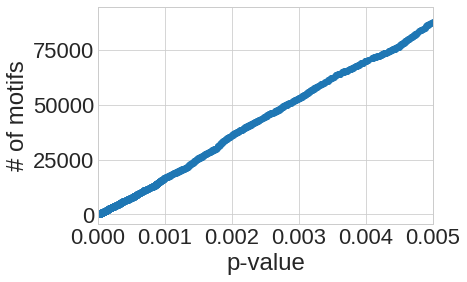

In [176]:
plt.scatter(unique_pvals, df_sizes)
plt.xlim((0, .005))
plt.xlabel('p-value')
plt.ylabel('# of motifs')
#plt.xscale('log', basex=10)
plt.show()

In [182]:
def true_positive_rate(p_val):
    fimo_sig = fimo2[fimo2['p-value'] <= p_val]
    return (fimo_sig['Intersect'] != 0.0).mean()
tp_rate = [true_positive_rate(up) for up in unique_pvals]

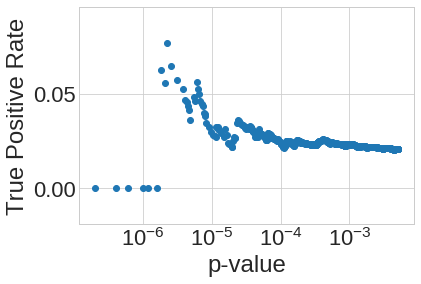

In [184]:
plt.xscale('log', basex=10)
plt.scatter(unique_pvals, tp_rate)
#plt.xlim((0, .005))
plt.xlabel('p-value')
plt.ylabel('True Positive Rate')
plt.show()

This seems like a good sign. It's slow growth, but as the threshold for a found motif becomes more strict, the rate of overlap with eCLIP data increases.

In [197]:
def true_positives(p_val):
    fimo_sig = fimo2[fimo2['p-value'] <= p_val]
    return (fimo_sig['Intersect'] != 0.0).sum()
tps = [true_positives(up) for up in unique_pvals]

In [198]:
threshold_df = pd.DataFrame.from_dict({'p-value':unique_pvals,
                                       'motifs': df_sizes,
                                       'TP rate': tp_rate, 
                                       'True Positives': tps})
threshold_df = threshold_df.sort_values('TP rate', ascending=False)
threshold_df.head()

TP rate  True Positives  motifs   p-value
672  0.076923               2      26  0.000002
722  0.064516               2      31  0.000003
724  0.062500               1      16  0.000002
743  0.057143               2      35  0.000003
693  0.056338               4      71  0.000006

In [199]:
outfile = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/fimo_threshold_df.csv'
threshold_df.to_csv(outfile)

In [200]:
threshold_df[threshold_df['True Positives'] > 1000].head()

TP rate  True Positives  motifs  p-value
56   0.021519            1097   50979  0.00288
23   0.021504            1008   46874  0.00264
291  0.021470            1078   50210  0.00283
125  0.021464            1011   47102  0.00265
55   0.021459            1101   51308  0.00290

We'll leave it as-is for now, but can revisit later.

## motif regions

Next up:

> Choose some sized region surrounding the binding site, and extract the sequences

One smal change, I'm going to center around the fimo motif instead, which makes things slightly easier. This is stil tricky though, since I need to be aware of the ends of transcripts as well, but I think the columns I have in `fimo2` are what I need.

* for each fimo motif
  * find center
  * try adding 150[-ish] to each side
  * if added region goes outside of transcript
    * limit expansion to transcript boarder
    
* save as .bed file

In [201]:
fimo2.head()

sequence_name  motif start  motif end  \
0  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1388       1398   
1  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1683       1693   
2  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...          204        214   
3  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1360       1370   
4  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1793       1803   

  strand       p-value matched_sequence         transcript seqname  \
0      +  2.040000e-07      AAGCACCCGTT  ENST00000588925.4   chr18   
1      +  4.380000e-04      AAGGACCCCTG  ENST00000588925.4   chr18   
2      +  5.930000e-04      ATGCCCCCATT  ENST00000588925.4   chr18   
3      +  1.340000e-03      GGGCGCCCGCT  ENST00000588925.4   chr18   
4      +  1.440000e-03      AAGCAAGGCCT  ENST00000588925.4   chr18   

   gene start  gene end gene strand     start       end  Intersect  
0    57639455  57738044           +  57640843  57640853        0.0  
1    57639455  57738044           +  57641138  57641148        0.0  
2    57639455  57738044           +  57639659  57639669        0.0  
3    57639455  57738044           +  57640815  57640825        0.0  
4    57639455  57738044           +  57641248  57641258        0.0

In [245]:
test_center = int((57640853 + 57640843) / 2)
print('center: ', test_center)
print('start: ', int(max(57639455, test_center-150)))
print('end: ', int(min(57738044, test_center+150)))

center:  57640848
start:  57640698
end:  57640998


In [252]:
#I'd rather have one function, but am struggling with pandas

def motif_region_start(row, n=150):
    center = (row['start'] + row['end']) / 2
    return int(max(row['gene start'], center-n))

def motif_region_end(row, n=150):
    center = (row['start'] + row['end']) / 2
    return int(min(row['gene end'], center+n))

In [253]:
motif_regions_df = pd.DataFrame()
motif_regions_df['seqname'] = fimo2['seqname'].values
motif_regions_df['start'] = fimo2.apply(motif_region_start, axis=1)
motif_regions_df['end'] = fimo2.apply(motif_region_end, axis=1)
motif_regions_df['name'] = fimo2['transcript']
motif_regions_df['score'] = 1
motif_regions_df['strand'] = fimo2['gene strand']

motif_regions_df.head()

seqname     start       end               name  score strand
0   chr18  57640698  57640998  ENST00000588925.4      1      +
1   chr18  57640993  57641293  ENST00000588925.4      1      +
2   chr18  57639514  57639814  ENST00000588925.4      1      +
3   chr18  57640670  57640970  ENST00000588925.4      1      +
4   chr18  57641103  57641403  ENST00000588925.4      1      +

In [254]:
outfile = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/motif_regions_df.bed'
motif_regions_df.to_csv(outfile, header=None, index=None, sep='\t')

DescribeResult(nobs=90119, minmax=(60, 300), mean=288.64875331506119, variance=966.69211075961471, skewness=-2.8252859432508126, kurtosis=6.938882902471764)


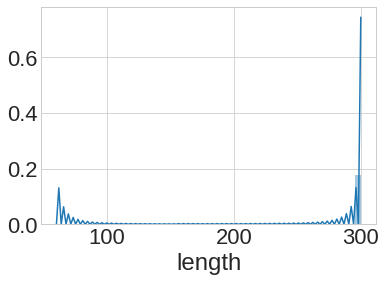

In [255]:
motif_regions_df['length'] = motif_regions_df['end'] - motif_regions_df['start']
print(describe(motif_regions_df['length']))
sns.distplot(motif_regions_df['length']);

there we go.

I've used [usegalaxy](https://usegalaxy.org) to make a fasta file with their getFastaBed tool. Now I can calc kmer profiles.

## kmer differences

In [256]:
%aimport kmer_counts

In [257]:
infasta = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/motif_regions_df.fa'
counter = kmer_counts.BasicCounter(infasta)
counter.get_counts()

HBox(children=(IntProgress(value=0, max=90119), HTML(value='')))

What's the correlation of the true positive motifs, and how does that group compare to everything else?

In [282]:
def random_corrs(counts, size, mean=True):
    index = np.random.choice(np.arange(len(counts)), size=size, replace=False)
    subset = counts[index]
    sim = np.corrcoef(subset)
    sim = sim[np.triu_indices_from(sim, 1)]
    return sim.mean() if mean else sim

In [260]:
tp_kmers = counter.counts[(fimo2['Intersect'] > 0)]
tp_kmers.shape

(1890, 4096)

In [262]:
tp_sim = np.corrcoef(tp_kmers)
tp_sim = tp_sim[np.triu_indices_from(tp_sim, 1)]
tp_sim.mean()

0.0050167894715116524

DescribeResult(nobs=1785105, minmax=(-0.078977947030949902, 1.0), mean=0.0050167894715116524, variance=0.001215514984910828, skewness=6.718600350305396, kurtosis=146.87351148124964)


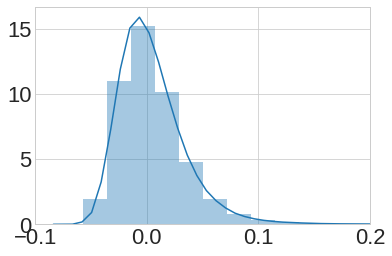

In [280]:
print(describe(tp_sim))
sns.distplot(tp_sim)
plt.xlim((-.1, .2))
plt.show()

In [276]:
sum(tp_sim == 1)

5

Hmmm...

In [279]:
tp_sim[tp_sim != 1].mean()

0.0050140025598245531

In [273]:
for i in range(5):
    print(random_corrs(counter.counts[(fimo2['Intersect'] == 0)], len(tp_kmers)))

0.000113647172939
0.000112622737713
6.6914104886e-05
6.21189865064e-05
4.39421882225e-05


DescribeResult(nobs=1785105, minmax=(-0.080033660130318846, 0.95294918360298997), mean=2.5595563287534616e-05, variance=0.00070465381191378801, skewness=1.6798056785423578, kurtosis=16.55347036144764)


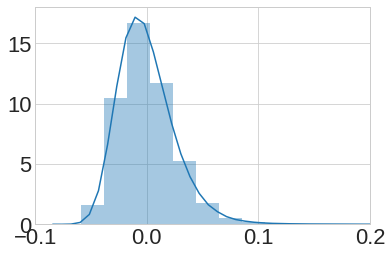

In [286]:
rand_sim = random_corrs(counter.counts[(fimo2['Intersect'] == 0)], len(tp_kmers), False)
print(describe(rand_sim))
sns.distplot(rand_sim)
plt.xlim((-.1, .2))
plt.show()

In [288]:
ks_2samp(tp_sim, rand_sim)

Ks_2sampResult(statistic=0.058343346749911151, pvalue=0.0)

In [292]:
[ks_2samp(tp_sim, random_corrs(counter.counts[(fimo2['Intersect'] == 0)], len(tp_kmers), False)) for i in range(10)]

[Ks_2sampResult(statistic=0.054915537181286278, pvalue=0.0),
 Ks_2sampResult(statistic=0.058058769652205355, pvalue=0.0),
 Ks_2sampResult(statistic=0.055692522288604884, pvalue=0.0),
 Ks_2sampResult(statistic=0.058604395819853772, pvalue=0.0),
 Ks_2sampResult(statistic=0.057233608107086109, pvalue=0.0),
 Ks_2sampResult(statistic=0.058593752188246695, pvalue=0.0),
 Ks_2sampResult(statistic=0.0543116511353674, pvalue=0.0),
 Ks_2sampResult(statistic=0.056683500410339982, pvalue=0.0),
 Ks_2sampResult(statistic=0.053749779424739796, pvalue=0.0),
 Ks_2sampResult(statistic=0.054258432977331905, pvalue=0.0)]

In [305]:
def sim_perm_test(counts, size, observed):
    out = sum(tqdm_notebook((1 if random_corrs(counts, size) > observed else 0 for i in range(1000)), total=1000))
    return out / 1000

In [297]:
fp_kmers = counter.counts[(fimo2['Intersect'] == 0)]

In [306]:
sim_perm_test(fp_kmers, len(tp_kmers), tp_sim.mean())

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

0.0

This indicates that `p < .001`.

If this is real, then there should be specific kmers that are over represented in the true binders.

In [313]:
kmers = [''.join(i) for i in product('AGTC', repeat=6)]

tp_kmers_means = tp_kmers.mean(axis=0)
fp_kmers_means = fp_kmers.mean(axis=0)
mean_diff_df = pd.DataFrame(data=list(zip(tp_kmers_means, fp_kmers_means)),
                            index=kmers,
                            columns=['True Positives',
                                     'False Positives',
                                     ])
mean_diff_df['diff'] = mean_diff_df['True Positives'] - mean_diff_df['False Positives']
mean_diff_df = mean_diff_df.sort_values('diff', ascending=False)
mean_diff_df.head()

True Positives  False Positives      diff
CCCCGG        0.353999        -0.007578  0.361576
CGGCCG        0.353753        -0.007566  0.361319
GGCCGC        0.334453        -0.007157  0.341610
CCGCCG        0.325378        -0.006973  0.332351
CGGGCC        0.325293        -0.006967  0.332260

In [314]:
mean_diff_df.tail()

True Positives  False Positives      diff
TAATTT       -0.191722         0.004125 -0.195848
TATTTT       -0.224288         0.004809 -0.229097
AATTTT       -0.225817         0.004870 -0.230687
TTTTTA       -0.227893         0.004878 -0.232771
ATTTTT       -0.245119         0.005233 -0.250352

## Build class

I'm going to have to redo the FIMO stuff several times.

First of all, I forgot to limit my fimo file to only expressed lncRNAs. So I need to rerun everything above. But I also want to play with parameters and proteins, so I'm going to collect the code here.

In [7]:
%aimport fimo_vs_eCLIP

In [57]:
k562 = '/home/jessime/Research/proteins/K562_p0.13_X_y_df.csv'
k562 = pd.read_csv(k562, index_col=0)
k562 = set(k562.index.values)

In [45]:
hepg2 = '/home/jessime/Research/proteins/HepG2_p0.13_X_y_df.csv'
hepg2 = pd.read_csv(hepg2, index_col=0)
hepg2 = set(hepg2.index.values)

In [46]:
expressed = k562 | hepg2
len(expressed)

4573

In [47]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'
gencode_file = '/home/jessime/Research/gencode/gencode.v22.long_noncoding_RNAs.gtf'
eclip_bed = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/IGF2BP1.bed'
outdir = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/fimo/'
outbed = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/motif_regions_df2.bed'

bed_maker = fimo_vs_eCLIP.BedMaker(infasta, 
                                   gencode_file, 
                                   eclip_bed, 
                                   outdir, 
                                   outbed, 
                                   expressed=expressed)
bed_maker.bed4galaxy()
bed_maker.fimo.head()

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

sequence_name  motif start  motif end  \
0  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1388       1398   
1  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1683       1693   
2  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...          204        214   
3  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1360       1370   
4  ENST00000588925.4|ENSG00000267787.4|OTTHUMG000...         1793       1803   

  strand       p-value matched_sequence         transcript           common  \
0      +  2.040000e-07      AAGCACCCGTT  ENST00000588925.4  RP11-35G9.5-001   
1      +  4.380000e-04      AAGGACCCCTG  ENST00000588925.4  RP11-35G9.5-001   
2      +  5.930000e-04      ATGCCCCCATT  ENST00000588925.4  RP11-35G9.5-001   
3      +  1.340000e-03      GGGCGCCCGCT  ENST00000588925.4  RP11-35G9.5-001   
4      +  1.440000e-03      AAGCAAGGCCT  ENST00000588925.4  RP11-35G9.5-001   

  seqname  gene start  gene end gene strand     start       end  Intersect  
0   chr18    57639455  57738044           +  57640843  57640853        0.0  
1   chr18    57639455  57738044           +  57641138  57641148        0.0  
2   chr18    57639455  57738044           +  57639659  57639669        0.0  
3   chr18    57639455  57738044           +  57640815  57640825        0.0  
4   chr18    57639455  57738044           +  57641248  57641258        0.0

In [48]:
bed_maker.fimo.Intersect.value_counts()

0.0     34093
1.0       881
2.0       300
3.0        77
4.0        47
7.0         2
5.0         2
6.0         1
10.0        1
Name: Intersect, dtype: int64

In [57]:
infasta = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/motif_regions_df2.fa'
analyzer = fimo_vs_eCLIP.Analyzer(infasta, bed_maker.fimo['Intersect'])
analyzer.run()
analyzer

HBox(children=(IntProgress(value=0, max=35404), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

TP mean=0.0034563378605715553
FP mean=4.763593928248391e-05
KS test p-values=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Permu. test p-value=0.0

In [59]:
analyzer = fimo_vs_eCLIP.Analyzer(infasta, bed_maker.fimo['Intersect'], k=4)
analyzer.run()
analyzer

HBox(children=(IntProgress(value=0, max=35404), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

TP mean=0.016675795954232495
FP mean=0.0003788360557125675
KS test p-values=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Permu. test p-value=0.0

Let's see if theres any difference if I change the size of the extended regions.

## cisbp to meme

Another thing I need is a converter from the CISPB-RNA to the MEME format for these PWMs. I don't want to have to do it by hand, cause I'm going to mess something up. I'm going to hard-code pretty much everything I can at this point in the hopes that I never have to come back to this, which seems likely.

In [2]:
name = 'motif1'
length = 6
pwm = 'This is just a test.'

meme_template = f"""MEME version 4
ALPHABET= ACGT

strands: + -

Background letter frequencies
A 0.2707 C 0.2357 G 0.2342 T 0.2594 

MOTIF {name}
letter-probability matrix: alength= 4 w= {length} 
{pwm}
"""
print(meme_template)

MEME version 4
ALPHABET= ACGT

strands: + -

Background letter frequencies
A 0.2707 C 0.2357 G 0.2342 T 0.2594 

MOTIF motif1
letter-probability matrix: alength= 4 w= 6 
This is just a test.



In [14]:
qki = '/home/jessime/Research/proteins/motifs/0_QKI_pwm.txt'
with open(qki) as qki:
    qki = qki.read()
qki
name = qki.split('Motif')[1].split('Family')[0].strip()
length = qki.splitlines()[-1].split()[0]
pwm = qki.split('Pos\tA\tC\tG\tU\n')[1]
pwm = pwm.splitlines()
pwm = ['\t'.join(l.split()[1:]) for l in pwm]
pwm = '\n'.join(pwm)
print(pwm)

0.824349987340932	0.0585500035959731	0.0585500035959731	0.0585500035959731
0.0146857902481741	0.955942627034291	0.0146857902481741	0.0146857902481741
0.0146857902481741	0.0146857902481741	0.0146857902481741	0.955942627034291
0.955942627034291	0.0146857902481741	0.0146857902481741	0.0146857902481741
0.955942627034291	0.0146857902481741	0.0146857902481741	0.0146857902481741
0.0146857902481741	0.820842135003972	0.0146857902481741	0.149786282278493
0.411147838945707	0.304972072342184	0.173045744395095	0.110834350817173


It's ugly, but I think it works and I have so few that I can check by hand.

In [38]:
def cisbp2meme(infile, outfile):
    with open(infile) as infile:
        infile = infile.read()
        
    name = infile.split('Motif')[1].split('Family')[0].strip()
    length = infile.splitlines()[-1].split()[0]
    pwm = infile.split('Pos\tA\tC\tG\tU\n')[1].splitlines()
    pwm = '\n'.join(['\t'.join(l.split()[1:]) for l in pwm])

    meme_template = f"""MEME version 4
    
ALPHABET= ACGT

strands: + -

Background letter frequencies
A 0.2707 C 0.2357 G 0.2342 T 0.2594 

MOTIF {name}
letter-probability matrix: alength= 4 w= {length} 
{pwm}"""
    
    with open(outfile, 'w') as outfile:
        outfile.write(meme_template)

In [21]:
!mkdir /home/jessime/Research/proteins/motifs/meme/

Ugh, here we go:

In [8]:
motif_files = '/home/jessime/Research/proteins/motifs/'
motif_files = [f for f in os.listdir(motif_files) if f.endswith('_pwm.txt')]

# motif_files_sorted = []
# for i in range(31):
#     for f in motif_files:
#         if f.startswith(f'{i}_'):
#             motif_files_sorted.append(f)

# motif_files_sorted

In [39]:
for mf in motif_files:
    infile = os.path.join('/home/jessime/Research/proteins/motifs/', mf)
    outfile = f"/home/jessime/Research/proteins/motifs/meme/{mf.split('.')[0]}_meme.txt"
    cisbp2meme(infile, outfile)

In [9]:
proteins = set(mf.split('_')[1] for mf in motif_files)
proteins

{'FXR1',
 'FXR2',
 'HNRNPA1',
 'HNRNPC',
 'IGF2BP1',
 'IGF2BP2',
 'IGF2BP3',
 'KHDRBS1',
 'NONO',
 'PCBP2',
 'PTBP1',
 'QKI',
 'SFPQ',
 'SRSF1',
 'SRSF9',
 'TIA1',
 'hnRNPK'}

In [42]:
for p in proteins:
    newdir = f'/home/jessime/Research/proteins/eCLIP/{p}/'
    if not os.path.exists(newdir):
        os.makedirs(newdir)

I also want to make hepg2 and k562 folders as well.

In [44]:
for p in proteins:
    newdir1 = f'/home/jessime/Research/proteins/eCLIP/{p}/HepG2'
    newdir2 = f'/home/jessime/Research/proteins/eCLIP/{p}/K562'
    if not os.path.exists(newdir1):
        os.makedirs(newdir1)
    if not os.path.exists(newdir2):
        os.makedirs(newdir2)

In [46]:
!gunzip -r /home/jessime/Research/proteins/eCLIP/

## All proteins

I'm going to have to run most of this again because of this `ignore` set. So I better keep my code clean. 

In [12]:
%aimport fimo_vs_eCLIP

In [13]:
ignore = {'IGF2BP1'}

In [184]:
def cat(filenames, outfile):
    with open(outfile, 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                outfile.write(infile.read())
            

hepg2 = 'HepG2'
k562 = 'K562'
for p in proteins:
    if p in ignore: continue
    #print(p, end=', ')
    base = f'/home/jessime/Research/proteins/eCLIP/{p}/'
    bed_files = [f'HepG2/{f}' for f in os.listdir(base+hepg2)] + [f'K562/{f}' for f in os.listdir(base+k562)]
    print(p, bed_files)
    bed_files = [os.path.join(base, bf) for bf in bed_files]
    outfile = f'/home/jessime/Research/proteins/eCLIP/{p}/{p}.bed'
    cat(bed_files, outfile)

HNRNPC ['HepG2/ENCFF534YQS.bed', 'HepG2/ENCFF230QOU.bed']
hnRNPK ['HepG2/ENCFF754XAQ.bed', 'HepG2/ENCFF288MWL.bed', 'K562/ENCFF241AOZ.bed', 'K562/ENCFF824IDO.bed']
IGF2BP2 ['K562/ENCFF988HSD.bed', 'K562/ENCFF082VUD.bed']
QKI ['HepG2/ENCFF551IJQ.bed', 'HepG2/ENCFF815XNW.bed', 'K562/ENCFF767WUU.bed', 'K562/ENCFF190XSX.bed']
FXR1 ['K562/ENCFF704PUC.bed', 'K562/ENCFF352KYI.bed']
HNRNPA1 ['HepG2/ENCFF722RBO.bed', 'HepG2/ENCFF599CUU.bed', 'K562/ENCFF100JBV.bed', 'K562/ENCFF902IDT.bed']
SFPQ ['HepG2/ENCFF960OTE.bed', 'HepG2/ENCFF417EZT.bed']
FXR2 ['K562/ENCFF394EQW.bed', 'K562/ENCFF237PCI.bed']
SRSF1 ['HepG2/ENCFF214HOA.bed', 'HepG2/ENCFF508DKJ.bed', 'K562/ENCFF373NZF.bed', 'K562/ENCFF205JTY.bed']
PTBP1 ['HepG2/ENCFF100OEX.bed', 'HepG2/ENCFF130PWU.bed', 'K562/ENCFF894KLP.bed', 'K562/ENCFF594PWG.bed']
KHDRBS1 ['K562/ENCFF214SWT.bed', 'K562/ENCFF738QUP.bed']
PCBP2 ['HepG2/ENCFF514GGZ.bed', 'HepG2/ENCFF454MWQ.bed']
TIA1 ['HepG2/ENCFF378HWC.bed', 'HepG2/ENCFF856EHA.bed', 'K562/ENCFF348TPU.bed', '

In [58]:
k562 = '/home/jessime/Research/proteins/K562_p0.13_X_y_df.csv'
k562 = pd.read_csv(k562, index_col=0)
k562 = set(k562.index.values)

hepg2 = '/home/jessime/Research/proteins/HepG2_p0.13_X_y_df.csv'
hepg2 = pd.read_csv(hepg2, index_col=0)
hepg2 = set(hepg2.index.values)

expressed = k562 | hepg2

In [172]:
meme_files = os.listdir('/home/jessime/Research/proteins/motifs/meme/')
meme_files = [f"/home/jessime/Research/proteins/motifs/meme/{mf}" for mf in meme_files]
meme_files_dict = {}
for p in proteins:
    if p in ignore: continue
    meme_files_dict[p] = [mf for mf in meme_files if p in mf]
pprint(meme_files_dict)

{'FXR1': ['/home/jessime/Research/proteins/motifs/meme/5_FXR1_pwm_meme.txt'],
 'FXR2': ['/home/jessime/Research/proteins/motifs/meme/9_FXR2_pwm_meme.txt'],
 'HNRNPA1': ['/home/jessime/Research/proteins/motifs/meme/26_HNRNPA1_pwm_meme.txt',
             '/home/jessime/Research/proteins/motifs/meme/27_HNRNPA1_pwm_meme.txt'],
 'HNRNPC': ['/home/jessime/Research/proteins/motifs/meme/19_HNRNPC_pwm_meme.txt'],
 'IGF2BP2': ['/home/jessime/Research/proteins/motifs/meme/30_IGF2BP2_pwm_meme.txt'],
 'IGF2BP3': ['/home/jessime/Research/proteins/motifs/meme/3_IGF2BP3_pwm_meme.txt'],
 'KHDRBS1': ['/home/jessime/Research/proteins/motifs/meme/4_KHDRBS1_pwm_meme.txt'],
 'NONO': ['/home/jessime/Research/proteins/motifs/meme/2_NONO_pwm_meme.txt'],
 'PCBP2': ['/home/jessime/Research/proteins/motifs/meme/8_PCBP2_pwm_meme.txt'],
 'PTBP1': ['/home/jessime/Research/proteins/motifs/meme/21_PTBP1_pwm_meme.txt',
           '/home/jessime/Research/proteins/motifs/meme/20_PTBP1_pwm_meme.txt'],
 'QKI': ['/home/jess

In [ ]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'
gencode_file = '/home/jessime/Research/gencode/gencode.v22.long_noncoding_RNAs.gtf'

intersect_dict = {}
for p, mf in meme_files_dict.items():
    eclip_bed = f'/home/jessime/Research/proteins/eCLIP/{p}/{p}.bed'
    outdir = f'/home/jessime/Research/proteins/eCLIP/{p}/'
    outbed = f'/home/jessime/Research/proteins/eCLIP/{p}/{p}_regions.bed'
    outintersect = f'/home/jessime/Research/proteins/eCLIP/{p}/intersect.csv'
    bed_maker = fimo_vs_eCLIP.BedMaker(infasta, 
                                       mf,
                                       gencode_file, 
                                       eclip_bed, 
                                       outdir, 
                                       outbed, 
                                       expressed=expressed)
    bed_maker.bed4galaxy()
    intersect_dict[p] = (bed_maker.fimo['Intersect'])
    bed_maker.fimo['Intersect'].to_csv(outintersect)

In [180]:
bed_maker.pwm_ls

['/home/jessime/Research/proteins/motifs/meme/12_SRSF1_pwm_meme.txt',
 '/home/jessime/Research/proteins/motifs/meme/14_SRSF1_pwm_meme.txt',
 '/home/jessime/Research/proteins/motifs/meme/11_SRSF1_pwm_meme.txt',
 '/home/jessime/Research/proteins/motifs/meme/17_SRSF1_pwm_meme.txt',
 '/home/jessime/Research/proteins/motifs/meme/18_SRSF1_pwm_meme.txt',
 '/home/jessime/Research/proteins/motifs/meme/10_SRSF1_pwm_meme.txt',
 '/home/jessime/Research/proteins/motifs/meme/13_SRSF1_pwm_meme.txt',
 '/home/jessime/Research/proteins/motifs/meme/15_SRSF1_pwm_meme.txt',
 '/home/jessime/Research/proteins/motifs/meme/16_SRSF1_pwm_meme.txt']

```python
import os

genome = '/proj/seq/data/hg38_UCSC/Sequence/WholeGenomeFasta/genome.fa'
with open('run_getfasta.sh', 'w') as outfile:
    outfile.write(f'genome={genome}\n')
    for bed in os.listdir():
        print(bed)
        if not bed.endswith('.bed'): 
            continue
        fa = bed.strip('.bed') + '.fa'
        cmd = f'bedtools getfasta -s -name -fi $genome -bed {bed} -fo {fa}\n'
        outfile.write(cmd)
```

In [28]:
inbed = '/home/jessime/Research/proteins/eCLIP/{}/intersect.csv'
intersect_dict = {p:pd.read_csv(inbed.format(p), squeeze=True, header=None, index_col=0) for p in proteins if p not in ignore}

In [31]:
[(k,sum(v != 0.)) for k,v in intersect_dict.items()]

[('KHDRBS1', 1125),
 ('SRSF1', 19781),
 ('SFPQ', 1119),
 ('IGF2BP3', 525),
 ('PTBP1', 2339),
 ('SRSF9', 3005),
 ('NONO', 1046),
 ('hnRNPK', 1204),
 ('QKI', 1780),
 ('TIA1', 4008),
 ('PCBP2', 1017),
 ('FXR1', 399),
 ('IGF2BP2', 340),
 ('FXR2', 278),
 ('HNRNPC', 3474),
 ('HNRNPA1', 5486)]

This SRSF1 size might be a memory problem.

In [ ]:
for p, inter in intersect_dict.items():
    infasta = f'/home/jessime/Research/proteins/eCLIP/region_fas/{p}_regions.fa'
    outgraph = f'/home/jessime/Research/pics/motif_distros/{p}_distro_p05.png'
    analyzer = fimo_vs_eCLIP.Analyzer(infasta, inter, outgraph, n=100, cap=1000)
    analyzer.run()

**organization**

In [106]:
!mkdir /home/jessime/Research/for_others/keri

In [107]:
!mv /home/jessime/Research/for_others/keri_* /home/jessime/Research/for_others/keri/

**end**

Let's make a negative control for the analysis. Cause I don't like how everything is significant.

In [ ]:
for i in range(5):
    infasta = '/home/jessime/Research/v22_transcripts01.fa'
    n = 15953
    tp_index = np.random.choice(np.arange(n), 1000, replace=False)
    intersect = np.zeros(n)
    intersect[tp_index] = 1
    outgraph = f'/home/jessime/Research/pics/motif_distros/negative_control{i}.png'
    analyzer = fimo_vs_eCLIP.Analyzer(infasta, intersect, outgraph, n=1000)
    analyzer.run()

That's pretty cool. I also forgot to save the counts for all of the proteins. So let's do that.

In [43]:
%aimport kmer_counts

In [51]:
!mkdir /home/jessime/Research/proteins/eCLIP/count_means

In [ ]:
for p, inter in intersect_dict.items():
    infasta = f'/home/jessime/Research/proteins/eCLIP/region_fas/{p}_regions.fa'
    outfile = f'/home/jessime/Research/proteins/eCLIP/count_means/{p}.csv'
    counter = kmer_counts.BasicCounter(infasta)
    counter.get_counts()
    tp_counts = counter.counts[inter != 0].mean(axis=0)
    tp_counts = pd.DataFrame(tp_counts, counter.kmers, ['Count'])
    tp_counts = tp_counts.sort_values('Count', ascending=False)
    tp_counts.to_csv(outfile)

In [53]:
tp_counts.sort_values('Count').head()

Count
ATTTTT -0.179912
CCTCCC -0.170514
GCCTCC -0.166150
CTCCTG -0.161077
ATTACA -0.155709

### Cleanup

At this point, I think it will be easiest if I circle back and redo IGFBP1, just so everything is consistant.

In [60]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'
gencode_file = '/home/jessime/Research/gencode/gencode.v22.long_noncoding_RNAs.gtf'
mf = ['/home/jessime/Research/proteins/motifs/meme/6_IGF2BP1_pwm_meme.txt']

eclip_bed = f'/home/jessime/Research/proteins/eCLIP/IGF2BP1/IGF2BP1.bed'
outdir = f'/home/jessime/Research/proteins/eCLIP/IGF2BP1/'
outbed = f'/home/jessime/Research/proteins/eCLIP/IGF2BP1/IGF2BP1_regions.bed'
outintersect = f'/home/jessime/Research/proteins/eCLIP/IGF2BP1/intersect.csv'
bed_maker = fimo_vs_eCLIP.BedMaker(infasta, 
                                   mf,
                                   gencode_file, 
                                   eclip_bed, 
                                   outdir, 
                                   outbed, 
                                   expressed=expressed)
bed_maker.bed4galaxy()
#intersect_dict[p] = (bed_maker.fimo['Intersect'])
bed_maker.fimo['Intersect'].to_csv(outintersect)

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

Exception in thread Thread-36:
Traceback (most recent call last):
  File "/home/jessime/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jessime/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/jessime/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [61]:
!cp /home/jessime/Research/proteins/eCLIP/IGF2BP1/motif_regions_df2.fa \
/home/jessime/Research/proteins/eCLIP/region_fas/IGF2BP1_regions.fa

In [63]:
infasta = f'/home/jessime/Research/proteins/eCLIP/region_fas/IGF2BP1_regions.fa'
outgraph = f'/home/jessime/Research/pics/motif_distros/IGF2BP1_distro_p05.png'
analyzer = fimo_vs_eCLIP.Analyzer(infasta, bed_maker.fimo['Intersect'], outgraph, n=100, cap=1000)
analyzer.run()

HBox(children=(IntProgress(value=0, max=35404), HTML(value='')))

HBox(children=(IntProgress(value=0), HTML(value='')))

In [64]:
tp_counts = analyzer.tp_counts.mean(axis=0)
tp_counts = pd.DataFrame(tp_counts, counter.kmers, ['Count'])
tp_counts = tp_counts.sort_values('Count', ascending=False)

outfile = f'/home/jessime/Research/proteins/eCLIP/count_means/IGF2BP1.csv'
tp_counts.to_csv(outfile)

I need to upgrade these plots. They're not looking so great right now.

In [9]:
proteins = {'FXR1',
 'FXR2',
 'HNRNPA1',
 'HNRNPC',
 'IGF2BP1',
 'IGF2BP2',
 'IGF2BP3',
 'KHDRBS1',
 'NONO',
 'PCBP2',
 'PTBP1',
 'QKI',
 'SFPQ',
 'SRSF1',
 'SRSF9',
 'TIA1',
 'hnRNPK'}

In [10]:
inbed = '/home/jessime/Research/proteins/eCLIP/{}/intersect.csv'
intersect_dict = {p:pd.read_csv(inbed.format(p), squeeze=True, header=None, index_col=0) for p in proteins}

In [ ]:
!mkdir /home/jessime/Research/pics/motif_distros2/

In [11]:
ignore = {}

In [20]:
for p, inter in intersect_dict.items():
    if p in ignore: continue
    infasta = f'/home/jessime/Research/proteins/eCLIP/region_fas/{p}_regions.fa'
    outgraph = f'/home/jessime/Research/pics/motif_distros2/{p}_distro_p005.png'
    analyzer = fimo_vs_eCLIP.Analyzer(infasta, inter, outgraph, do_ks_test=False, n=200, cap=1000)
    analyzer.run()

HBox(children=(IntProgress(value=0, max=23434), HTML(value='')))

HBox(children=(IntProgress(value=0, max=200), HTML(value='')))

In [21]:
!mkdir /home/jessime/Research/pics/motif_distros3

In [ ]:
for p, inter in intersect_dict.items():
    if p in ignore: continue
    infasta = f'/home/jessime/Research/proteins/eCLIP/region_fas/{p}_regions.fa'
    outgraph = f'/home/jessime/Research/pics/motif_distros3/{p}_distro_p005.png'
    analyzer = fimo_vs_eCLIP.Analyzer(infasta, inter, outgraph, do_ks_test=False, n=200, cap=1000, quality='high')
    analyzer.run()

They're still looking bad...

In [18]:
!mkdir /home/jessime/Research/pics/motif_distros4

In [ ]:
def custom_plot(fp_sim_mean_ls, tp_sim_mean, outgraph):
    plt.semilogx()
    ax = sns.distplot(fp_sim_mean_ls, kde_kws={'linewidth': 6})
    top = np.mean(ax.get_ylim())*1.5
    x = (tp_sim_mean, tp_sim_mean)
    plt.plot(x, (0, top), linewidth=10)
    plt.locator_params(axis='y', nbins=2)
    plt.xlim((.000007, .02))
    plt.yticks(fontsize=64)
    plt.xticks([])
    plt.savefig(outgraph, bbox_inches='tight', dpi=300)
    plt.clf()
    
for p, inter in intersect_dict.items():
    if p in ignore: continue
    infasta = f'/home/jessime/Research/proteins/eCLIP/region_fas/{p}_regions.fa'
    outgraph = f'/home/jessime/Research/pics/motif_distros4/{p}_distro_p005.png'
    analyzer = fimo_vs_eCLIP.Analyzer(infasta, inter, do_ks_test=False, n=200, cap=1000, quality='high')
    analyzer.run()
    custom_plot(analyzer.fp_sim_mean_ls, analyzer.tp_sim_mean, outgraph)

In [34]:
def with_x(fp_sim_mean_ls, tp_sim_mean, outgraph):
    plt.semilogx()
    ax = sns.distplot(fp_sim_mean_ls, kde_kws={'linewidth': 6})
    top = np.mean(ax.get_ylim())*1.5
    x = (tp_sim_mean, tp_sim_mean)
    plt.plot(x, (0, top), linewidth=10)
    plt.locator_params(axis='x', numticks=2)
    plt.locator_params(axis='y', nbins=2)
    plt.xlim((.000007, .02))
    plt.yticks(fontsize=64)
    plt.xticks(fontsize=64)
    plt.savefig(outgraph, bbox_inches='tight', dpi=300)
    plt.clf()
    
infasta = f'/home/jessime/Research/proteins/eCLIP/region_fas/TIA1_regions.fa'
outgraph = '/home/jessime/Research/pics/motif_distros4/TIA1_2.png'
analyzer = fimo_vs_eCLIP.Analyzer(infasta, intersect_dict['TIA1'], do_ks_test=False, n=200, cap=1000, quality='high')
analyzer.run()
with_x(analyzer.fp_sim_mean_ls, analyzer.tp_sim_mean, outgraph)


HBox(children=(IntProgress(value=0, max=77512), HTML(value='')))

Exception in thread Thread-89:
Traceback (most recent call last):
  File "/home/jessime/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jessime/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/jessime/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



HBox(children=(IntProgress(value=0, max=200), HTML(value='')))

In [27]:
p

'hnRNPK'

# Mauro grant

This is some quick work I'm doing for Mauro's grant. I did most of it in longleaf under `~/submissions/mauro_grant/`.

Now I'm trying to see if salmon quantified the amount of ERCC spikeins like we would expect from their initial concentrations.

In [110]:
ercc_conc = '/home/jessime/Research/for_others/mauro_grant/ercc_conc.xlsx'
ercc_conc = pd.read_excel(ercc_conc, index_col=0)
ercc_conc.head()

ERCC ID subgroup  concentration in Mix 1 (attomoles/ul)  \
Re-sort ID                                                               
1           ERCC-00130        A                               30000.00   
2           ERCC-00004        A                                7500.00   
3           ERCC-00136        A                                1875.00   
4           ERCC-00108        A                                 937.50   
5           ERCC-00116        A                                 468.75   

            concentration in Mix 2 (attomoles/ul)  expected fold-change ratio  \
Re-sort ID                                                                      
1                                       7500.0000                         4.0   
2                                       1875.0000                         4.0   
3                                        468.7500                         4.0   
4                                        234.3750                         4.0   
5                                        117.1875                         4.0   

            log2(Mix 1/Mix 2)  
Re-sort ID                     
1                         2.0  
2                         2.0  
3                         2.0  
4                         2.0  
5                         2.0

In [114]:
quant_sf = '/home/jessime/Research/for_others/mauro_grant/quant.sf'
quant_sf = pd.read_table(quant_sf)
quant_sf.tail()

Name  Length  EffectiveLength         TPM  NumReads
160085  DQ516779    1022            773.0    0.087043      12.0
160086  DQ668363     872            623.0    3.267030     363.0
160087  DQ516776    1024            775.0    0.086819      12.0
160088  DQ516773    1023            774.0    3.093290     427.0
160089  DQ854994     505            256.0  434.152000   19822.0

In [119]:
ercc_gtf = '/home/jessime/Research/for_others/mauro_grant/ERCC92.gtf'
tx_name2ercc_id = {}
with open(ercc_gtf) as ercc_gtf:
    for line in ercc_gtf:
        data = line.strip().split()
        tx_name2ercc_id[data[-1][1:-2]] = data[0]

In [120]:
quant_sf = quant_sf.replace({'Name':tx_name2ercc_id})
quant_sf.tail()

Name  Length  EffectiveLength         TPM  NumReads
160085  ERCC-00164    1022            773.0    0.087043      12.0
160086  ERCC-00165     872            623.0    3.267030     363.0
160087  ERCC-00168    1024            775.0    0.086819      12.0
160088  ERCC-00170    1023            774.0    3.093290     427.0
160089  ERCC-00171     505            256.0  434.152000   19822.0

In [121]:
merged_df = pd.merge(ercc_conc, quant_sf, left_on='ERCC ID', right_on='Name')
print(merged_df.shape)
merged_df.head()

(92, 11)


ERCC ID subgroup  concentration in Mix 1 (attomoles/ul)  \
0  ERCC-00130        A                               30000.00   
1  ERCC-00004        A                                7500.00   
2  ERCC-00136        A                                1875.00   
3  ERCC-00108        A                                 937.50   
4  ERCC-00116        A                                 468.75   

   concentration in Mix 2 (attomoles/ul)  expected fold-change ratio  \
0                              7500.0000                         4.0   
1                              1875.0000                         4.0   
2                               468.7500                         4.0   
3                               234.3750                         4.0   
4                               117.1875                         4.0   

   log2(Mix 1/Mix 2)        Name  Length  EffectiveLength        TPM  NumReads  
0                2.0  ERCC-00130    1059            810.0  2185.4500  315712.0  
1                2.0  ERCC-00004     523            274.0  1177.7100   57551.0  
2                2.0  ERCC-00136    1033            784.0   134.9840   18874.0  
3                2.0  ERCC-00108    1022            773.0    51.2178    7061.0  
4                2.0  ERCC-00116    1991           1742.0    30.1210    9358.0

/home/jessime/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


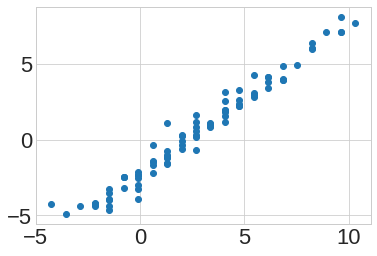

In [123]:
plt.scatter(np.log(merged_df['concentration in Mix 1 (attomoles/ul)']), np.log(merged_df['TPM']))
plt.show()

In [124]:
outfile = '/home/jessime/Research/for_others/mauro_grant/quant_ercc_id.sf'
quant_sf.to_csv(outfile, index=None, sep='\t')

Megan has done some processing, now I just need to change identifiers

In [65]:
quant_df = '/home/jessime/Research/for_others/mauro_grant/salmon_quant_mpc.txt'
quant_df = pd.read_csv(quant_df, sep='\t')
quant_df.head()

Name  Length  EffectiveLength         TPM     NumReads  \
0   ENSMUST00000000001.4    3262           3013.0   25.651500   13784.1000   
1  ENSMUST00000000003.13     902            653.0    0.000000       0.0000   
2   ENSMUST00000000010.8    2574           2325.0    0.117301      48.6396   
3  ENSMUST00000000028.13    2143           1894.0    4.727820    1597.0000   
4  ENSMUST00000000033.11    3708           3459.0  457.357000  282144.0000   

         TPMK      log tpkm      log mol molecules per 4ug molecules per cell  
0    7.863734   2.975214504  21.46594707       2896636.191        21.72477143  
1    0.000000         #NUM!        #NUM!             #NUM!              #NUM!  
2    0.045571  -4.455724836  13.88644958       15143.90427        0.113579282  
3    2.206169    1.14154326  19.59561736       792261.6039         5.94196203  
4  123.343312   6.946535678  25.51666226       48004364.97        360.0327373

In [74]:
%aimport gtf

In [78]:
inGTF = '/home/jessime/Research/M14_full_unspliced.gtf'
maker = gtf.Maker(inGTF)
maker.filter_feature()
maker.append_attribute(col=1, name='transcript_id')
maker.append_attribute(col=5, name='transcript_name')
maker.expandedDF.head()

seqname   source     feature    start      end score strand frame  \
1     chr1   HAVANA  transcript  3073253  3074322     .      +     .   
4     chr1  ENSEMBL  transcript  3102016  3102125     .      +     .   
7     chr1   HAVANA  transcript  3205901  3671498     .      -     .   
9     chr1   HAVANA  transcript  3205901  3216344     .      -     .   
12    chr1   HAVANA  transcript  3206523  3215632     .      -     .   

                                            attribute         transcript_id  \
1   gene_id "ENSMUSG00000102693.1"; transcript_id ...  ENSMUST00000193812.1   
4   gene_id "ENSMUSG00000064842.1"; transcript_id ...  ENSMUST00000082908.1   
7   gene_id "ENSMUSG00000051951.5"; transcript_id ...            UNSPLICED0   
9   gene_id "ENSMUSG00000051951.5"; transcript_id ...  ENSMUST00000162897.1   
12  gene_id "ENSMUSG00000051951.5"; transcript_id ...  ENSMUST00000159265.1   

      transcript_name  
1   4933401J01Rik-201  
4         Gm26206-201  
7             Xkr4-un  
9            Xkr4-203  
12           Xkr4-202

In [80]:
names_df = maker.expandedDF[['transcript_id', 'transcript_name']]
names_df = names_df.set_index('transcript_id')
names_df.head()

transcript_name
transcript_id                          
ENSMUST00000193812.1  4933401J01Rik-201
ENSMUST00000082908.1        Gm26206-201
UNSPLICED0                      Xkr4-un
ENSMUST00000162897.1           Xkr4-203
ENSMUST00000159265.1           Xkr4-202

In [98]:
quant_common = quant_df.set_index('Name')
quant_common = quant_common.join(names_df)
quant_common['transcript_name'] = quant_common.apply(lambda row: row.name if 'ERCC' in row.name else row.transcript_name, axis=1)
quant_common.head()

Length  EffectiveLength         TPM     NumReads  \
Name                                                                      
ENSMUST00000000001.4     3262           3013.0   25.651500   13784.1000   
ENSMUST00000000003.13     902            653.0    0.000000       0.0000   
ENSMUST00000000010.8     2574           2325.0    0.117301      48.6396   
ENSMUST00000000028.13    2143           1894.0    4.727820    1597.0000   
ENSMUST00000000033.11    3708           3459.0  457.357000  282144.0000   

                             TPMK      log tpkm      log mol  \
Name                                                           
ENSMUST00000000001.4     7.863734   2.975214504  21.46594707   
ENSMUST00000000003.13    0.000000         #NUM!        #NUM!   
ENSMUST00000000010.8     0.045571  -4.455724836  13.88644958   
ENSMUST00000000028.13    2.206169    1.14154326  19.59561736   
ENSMUST00000000033.11  123.343312   6.946535678  25.51666226   

                      molecules per 4ug molecules per cell transcript_name  
Name                                                                        
ENSMUST00000000001.4        2896636.191        21.72477143       Gnai3-201  
ENSMUST00000000003.13             #NUM!              #NUM!        Pbsn-201  
ENSMUST00000000010.8        15143.90427        0.113579282       Hoxb9-201  
ENSMUST00000000028.13       792261.6039         5.94196203       Cdc45-201  
ENSMUST00000000033.11       48004364.97        360.0327373        Igf2-201

In [100]:
quant_common[quant_common.index.str.contains('ERCC')].head()

Length  EffectiveLength          TPM  NumReads         TPMK  \
Name                                                                      
ERCC-00002    1061            812.0  1225.090000  177415.0  1154.655985   
ERCC-00003    1023            774.0   127.231000   17563.0   124.370479   
ERCC-00004     523            274.0  1177.710000   57551.0  2251.835564   
ERCC-00009     984            735.0    51.363600    6733.0    52.198780   
ERCC-00012     994            745.0     0.015052       2.0     0.015143   

                log tpkm      log mol molecules per 4ug molecules per cell  \
Name                                                                         
ERCC-00002   10.17324737  28.80788185       469933655.2        3524.502414   
ERCC-00003   6.958500273  25.52886605       48412157.28        363.0911796   
ERCC-00004   11.13688577  29.79078515       928795122.4        6965.963418   
ERCC-00009   5.705944197  24.25126907       19969142.82        149.7685712   
ERCC-00012  -6.045170829  12.26522763       4922.677911        0.036920084   

           transcript_name  
Name                        
ERCC-00002      ERCC-00002  
ERCC-00003      ERCC-00003  
ERCC-00004      ERCC-00004  
ERCC-00009      ERCC-00009  
ERCC-00012      ERCC-00012

In [101]:
outfile = '/home/jessime/Research/for_others/mauro_grant/salmon_mpc_common.txt'
quant_common.to_csv(outfile, sep='\t')

16777216

# Polysomes

**[R2C2]**

> It would be also interesting to test the association with polysomes as a feature that may be determined by k-mer content.

Here's the paper I assume they are refering to:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4878613/

And the supplimental data:

http://rnajournal.cshlp.org/content/suppl/2016/04/15/rna.053561.115.DC1/Supp_TableS1.txt

There are a few other papers that support the idea that lncRNAs associate with polysomes, but this is the only one we could find that was done in K562 cells. 

The first thing I need to do is make sure I understand which lncRNAs are labeled as polysome associate and which aren't. Within that, I also need to make sure I have the proper number for the "high confidence non-coding"

In [8]:
polysomes = '/home/jessime/Research/papers/revisions/Supp_TableS1.txt'
polysomes = pd.read_csv(polysomes, delim_whitespace=True, index_col=0)
polysomes.head()

GeneID    Chr  Trans_Start  Trans_End Strand  \
TransID                                                                  
ENST00000359941  ENSG00000182165   chr7     86954541   86974831      -   
ENST00000369605  ENSG00000203875   chr6     86386725   86388420      -   
ENST00000376445  ENSG00000226465  chr20     25731854   25733397      +   
ENST00000381105  ENSG00000205662   chrX      3847910    3855896      -   
ENST00000398043  ENSG00000214293   chr7     77313538   77325582      -   

                 Cellular_Localization  FreeC_Conc  LightP_Conc  HeavyP_Conc  \
TransID                                                                        
ENST00000359941                      1         NaN     5.594198          NaN   
ENST00000369605                      1    8.196802     7.469175     6.592363   
ENST00000376445                      1    5.563272     5.883338     5.553849   
ENST00000381105                      1    6.004036     5.930130     5.350944   
ENST00000398043                      1    5.696608     6.293894     5.320606   

                 Ribosomal_Classification      CPAT  PhyloCSF       CPC  MS  
TransID                                                                      
ENST00000359941                       2.0  0.523804         1  0.877271   0  
ENST00000369605                       1.0  0.016470         0  0.127998   0  
ENST00000376445                       2.0  0.087755         0  0.861666   0  
ENST00000381105                       1.0  0.646772         1  0.109461   0  
ENST00000398043                       2.0  0.052153         0 -1.086060   0

In [9]:
len(polysomes)

14498

>Any gene was discarded that has at least one transcript fulfilling one of the following conditions: overlapping on the same strand a Gencode v18 annotated pseudogene, overlapping on the same strand an exon of a protein-coding mRNA, or lying within 5 kb and on the same strand as an Gencode v18 protein-coding transcript or pseudogene (1140 transcripts, 517 genes). This resulted in a data set of 13,358 lncRNA transcripts (8615 genes).

In [12]:
13358 + 1140

14498

So S1 contains all GENCODE v7 lncRNAs. Let's get rid of the discarded ones.

In [13]:
polysomes['Cellular_Localization'].value_counts()

3    8371
4    4350
5    1140
1     345
2     292
Name: Cellular_Localization, dtype: int64

In [19]:
discarded = polysomes[polysomes['Cellular_Localization'] != 5].copy()
len(discarded)

13358

> Altogether 9008 lncRNA transcripts (62.1%) (6748 genes, 73.9% of total) were unanimously classified as noncoding—these we refer to as “filtered lncRNAs” (Fig. 2A). The remaining genes of uncertain protein-coding status are henceforth referred to as “potential protein-coding RNAs” (4350 transcripts, 1867 genes). 

Annoyingly, 'noncoding' isn't a column in the table. We're going to have to make the column here. Thankfully, they do provide a detailed description of the filtering.

> Next, genes having at least one transcript predicted as protein-coding by at least one method, were classified as “potential protein-coding RNAs” (4350 transcripts, 1867 genes), while the remainder were classified as “filtered lncRNAs.” The four filtering methods used were: (i) PhyloCSF, a comparative genomics method based on phylogenetic conservation across species (Lin et al. 2011). The analysis was performed using 29 mammalian nucleotide sequence alignments and assessing the three sense frames. The alignment of each transcript was extracted from stitch gene blocks given a set of exons from Galaxy (Goecks et al. 2010). Transcripts with score >95 were classified as potential protein-coding, following the work of Sun et al. (2013). (ii) Coding Potential Assessment Tool (CPAT) (Wang et al. 2013), using the score threshold of 0.364 described by the authors. (iii) Coding Potential Calculator (CPC), a support vector machine-based classifier based on six biological sequence features, using a cutoff of 1 (Kong et al. 2007). (iv) Peptides: We used experimental mass spectrometry tag mappings from Pinstripe to identify any transcripts producing peptides (Gascoigne et al. 2012). Any transcript having an exonic, same strand tag mapping were designated as “potential protein-coding.” Collectively, sequence filters reduced the pool of analyzed transcripts to 9008 transcripts (6748 genes).

So let's make the column.

In [70]:
def define_coding_potential(row):
    return any((row['CPAT'] >= .364, row['CPC'] >1, row['MS'] == 1,))

In [71]:
discarded['coding'] = discarded.apply(define_coding_potential, axis=1)
discarded['coding'].value_counts()

False    9227
True     4131
Name: coding, dtype: int64

In [63]:
discarded['PhyloCSF'].value_counts()

0    7897
1    5461
Name: PhyloCSF, dtype: int64

In [67]:
(discarded['CPAT'] > 0.364).sum()

1889

In [68]:
(discarded['CPC'] > 1).sum()

2039

In [69]:
discarded['MS'].value_counts()

0    11533
1     1825
Name: MS, dtype: int64

In [72]:
4350 - 4131

219

> Ribosomal_Classification: Classification for transcripts present in the cytoplasm: 1: free C.; 2: Light P.; 3: Heavy P.

In [43]:
print(polysomes['Ribosomal_Classification'].value_counts().sum())
polysomes['Ribosomal_Classification'].value_counts()

5835


0.0    4608
2.0     969
1.0     208
3.0      50
Name: Ribosomal_Classification, dtype: int64

## Without filtering

> Hey Jessime can we just use gencode annotation? If gencode calls it a lncrna then we can call it an lnc. Any gencode lnc that they provide polysome data for we can use. Is that info in the file?

In [7]:
%aimport fasta

In [8]:
polysomes = '/home/jessime/Research/papers/revisions/Supp_TableS1.txt'
polysomes = pd.read_csv(polysomes, delim_whitespace=True, index_col=0)
discarded = polysomes[polysomes['Cellular_Localization'] != 5].copy()


In [9]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'
v22_names = fasta.Extracter(infasta).get_names('ensembl')
v22_names[:5]

['ENST00000473358.1',
 'ENST00000417324.1',
 'ENST00000466430.4',
 'ENST00000610542.1',
 'ENST00000495576.1']

In [10]:
v22_names_set = set((n[:-2] for n in v22_names))

In [11]:
sum(n in v22_names_set for n in discarded.index.values)

7596

In [12]:
v7_in_v22 = polysomes[polysomes.index.isin(v22_names_set)].copy()
print(len(v7_in_v22))
v7_in_v22.head()

7759


GeneID    Chr  Trans_Start  Trans_End Strand  \
TransID                                                                  
ENST00000359941  ENSG00000182165   chr7     86954541   86974831      -   
ENST00000369605  ENSG00000203875   chr6     86386725   86388420      -   
ENST00000376445  ENSG00000226465  chr20     25731854   25733397      +   
ENST00000381105  ENSG00000205662   chrX      3847910    3855896      -   
ENST00000399966  ENSG00000185203   chrX    155244288  155246502      -   

                 Cellular_Localization  FreeC_Conc  LightP_Conc  HeavyP_Conc  \
TransID                                                                        
ENST00000359941                      1         NaN     5.594198          NaN   
ENST00000369605                      1    8.196802     7.469175     6.592363   
ENST00000376445                      1    5.563272     5.883338     5.553849   
ENST00000381105                      1    6.004036     5.930130     5.350944   
ENST00000399966                      1    5.540766     5.949863          NaN   

                 Ribosomal_Classification      CPAT  PhyloCSF       CPC  MS  
TransID                                                                      
ENST00000359941                       2.0  0.523804         1  0.877271   0  
ENST00000369605                       1.0  0.016470         0  0.127998   0  
ENST00000376445                       2.0  0.087755         0  0.861666   0  
ENST00000381105                       1.0  0.646772         1  0.109461   0  
ENST00000399966                       2.0  0.198114         0  0.927063   0

**Next up, making a classification scheme from the Cellular Localization and Ribosomal Classifications columns.**

> Cellular_Localization: Classification of the transcripts into 5 different categories: 
> 1. Present in cytoplasm (from polysome profiling experiment, K562 cell line)
> 2. Present in nucleus (from ENCODE nucleus RNAseq data, K562 cell line), but not in cytoplasm (polysome profiling experiment)
> 3. Not present in cytoplasm (polysome profiling experiment) nor in nucleus (ENCODE nucleus RNAseq data, K562 cell line)
> 4. Transcripts classified as potential protein coding transcripts
> 5. Discarded transcripts.

and

> Ribosomal_Classification: Classification for transcripts present in the cytoplasm: 1: free C.; 2: Light P.; 3: Heavy P.

In [13]:
v7_in_v22['Cellular_Localization'].value_counts()

3    5674
4    1612
2     178
5     163
1     132
Name: Cellular_Localization, dtype: int64

In [14]:
v7_in_v22['Ribosomal_Classification'].value_counts()

0.0    1621
2.0     222
1.0      57
3.0       7
Name: Ribosomal_Classification, dtype: int64

In [15]:
func = lambda row: 1 if row['Ribosomal_Classification'] in (2, 3) else 0
v7_in_v22['polysome'] = v7_in_v22.apply(func, axis=1)
v7_in_v22['polysome'].value_counts()

0    7530
1     229
Name: polysome, dtype: int64

In [16]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'
v22_names_common = fasta.Extracter(infasta).get_names('common')
v22_names_common[:5]

['RP11-34P13.3-001',
 'FAM138A-001',
 'RP11-34P13.7-001',
 'RP11-34P13.7-201',
 'RP11-34P13.8-001']

In [17]:
id2common = {k[:-2]:v for k,v in zip(v22_names, v22_names_common)}

In [18]:
func = lambda row: id2common[row.name]
v7_in_v22['common'] = v7_in_v22.apply(func, axis=1)
v7_in_v22.head()

GeneID    Chr  Trans_Start  Trans_End Strand  \
TransID                                                                  
ENST00000359941  ENSG00000182165   chr7     86954541   86974831      -   
ENST00000369605  ENSG00000203875   chr6     86386725   86388420      -   
ENST00000376445  ENSG00000226465  chr20     25731854   25733397      +   
ENST00000381105  ENSG00000205662   chrX      3847910    3855896      -   
ENST00000399966  ENSG00000185203   chrX    155244288  155246502      -   

                 Cellular_Localization  FreeC_Conc  LightP_Conc  HeavyP_Conc  \
TransID                                                                        
ENST00000359941                      1         NaN     5.594198          NaN   
ENST00000369605                      1    8.196802     7.469175     6.592363   
ENST00000376445                      1    5.563272     5.883338     5.553849   
ENST00000381105                      1    6.004036     5.930130     5.350944   
ENST00000399966                      1    5.540766     5.949863          NaN   

                 Ribosomal_Classification      CPAT  PhyloCSF       CPC  MS  \
TransID                                                                       
ENST00000359941                       2.0  0.523804         1  0.877271   0   
ENST00000369605                       1.0  0.016470         0  0.127998   0   
ENST00000376445                       2.0  0.087755         0  0.861666   0   
ENST00000381105                       1.0  0.646772         1  0.109461   0   
ENST00000399966                       2.0  0.198114         0  0.927063   0   

                 polysome             common  
TransID                                       
ENST00000359941         1        TP53TG1-001  
ENST00000369605         0          SNHG5-001  
ENST00000376445         1   RP13-401N8.1-001  
ENST00000381105         0  RP11-706O15.7-001  
ENST00000399966         1         WASIR1-001

In [19]:
groups = '/home/jessime/Research/groups_paper.csv'
groups = pd.read_csv(groups, index_col=0)
groups.head()

Group
RP11-34P13.3-001     3
FAM138A-001       Null
RP11-34P13.7-001  Null
RP11-34P13.7-201  Null
RP11-34P13.8-001  Null

In [20]:
print(v7_in_v22.shape)
v7_in_v22 = pd.merge(v7_in_v22, groups, left_on='common', right_index=True)
print(v7_in_v22.shape)
v7_in_v22.head()

(7759, 16)
(7759, 17)


GeneID    Chr  Trans_Start  Trans_End Strand  \
TransID                                                                  
ENST00000359941  ENSG00000182165   chr7     86954541   86974831      -   
ENST00000369605  ENSG00000203875   chr6     86386725   86388420      -   
ENST00000376445  ENSG00000226465  chr20     25731854   25733397      +   
ENST00000381105  ENSG00000205662   chrX      3847910    3855896      -   
ENST00000399966  ENSG00000185203   chrX    155244288  155246502      -   

                 Cellular_Localization  FreeC_Conc  LightP_Conc  HeavyP_Conc  \
TransID                                                                        
ENST00000359941                      1         NaN     5.594198          NaN   
ENST00000369605                      1    8.196802     7.469175     6.592363   
ENST00000376445                      1    5.563272     5.883338     5.553849   
ENST00000381105                      1    6.004036     5.930130     5.350944   
ENST00000399966                      1    5.540766     5.949863          NaN   

                 Ribosomal_Classification      CPAT  PhyloCSF       CPC  MS  \
TransID                                                                       
ENST00000359941                       2.0  0.523804         1  0.877271   0   
ENST00000369605                       1.0  0.016470         0  0.127998   0   
ENST00000376445                       2.0  0.087755         0  0.861666   0   
ENST00000381105                       1.0  0.646772         1  0.109461   0   
ENST00000399966                       2.0  0.198114         0  0.927063   0   

                 polysome             common Group  
TransID                                             
ENST00000359941         1        TP53TG1-001  Null  
ENST00000369605         0          SNHG5-001     3  
ENST00000376445         1   RP13-401N8.1-001  Null  
ENST00000381105         0  RP11-706O15.7-001     5  
ENST00000399966         1         WASIR1-001     4

In [21]:
associated = v7_in_v22[v7_in_v22['polysome'] == True]
associated['common'].values[:5]

array(['TP53TG1-001', 'RP13-401N8.1-001', 'WASIR1-001', 'DANCR-001',
       'ZNF385D-AS1-001'], dtype=object)

To make the expected counts, we should only keep lncRNAs that are expressed in K562 cells

In [90]:
k562 = '/home/jessime/Research/proteins/K562_p0.13_X_y_df.csv'
k562 = pd.read_csv(k562, index_col=0)
k562 = set(k562.index.values)
len(k562)

3277

In [92]:
groups_expressed = groups.loc[groups.index.isin(k562)]

groups_expressed['Group'].value_counts() / len(groups_expressed)

Null    0.283491
1       0.222765
3       0.171803
2       0.157461
4       0.092157
5       0.072322
Name: Group, dtype: float64

In [93]:
groups['Group'].value_counts() / len(groups)

Null    0.471823
1       0.189306
2       0.126120
3       0.095280
4       0.068764
5       0.048706
Name: Group, dtype: float64

In [94]:
obs = pd.DataFrame(associated['Group'].value_counts())
exp = groups_expressed['Group'].value_counts() * len(associated) / len(groups_expressed)
exp = pd.DataFrame(exp.round()).astype(int)
contingency = obs.join(exp, lsuffix='1').sort_index()
contingency.columns = ['observed', 'expected']
contingency


observed  expected
1           24        51
2           32        36
3           52        39
4           25        21
5           11        17
Null        85        65

In [95]:
contingency.sum(axis=0)

observed    229
expected    229
dtype: int64

In [96]:
chisquare(contingency['observed'], contingency['expected'])

Power_divergenceResult(statistic=28.105293399411046, pvalue=3.4713628768443363e-05)

awesome.

Let's transform this data so seaborn can take it.

In [97]:
chi_sns = pd.concat((contingency, contingency))
chi_sns = chi_sns.reset_index()
chi_sns['expected'] = chi_sns['observed'].values[:6].tolist() + chi_sns['expected'].values[6:].tolist() 
chi_sns.columns = ['Community', 'Type', 'Count']
chi_sns['Type'] = ['Observed'] * 6 + ['Expected'] * 6
chi_sns

Community      Type  Count
0          1  Observed     24
1          2  Observed     32
2          3  Observed     52
3          4  Observed     25
4          5  Observed     11
5       Null  Observed     85
6          1  Expected     51
7          2  Expected     36
8          3  Expected     39
9          4  Expected     21
10         5  Expected     17
11      Null  Expected     65

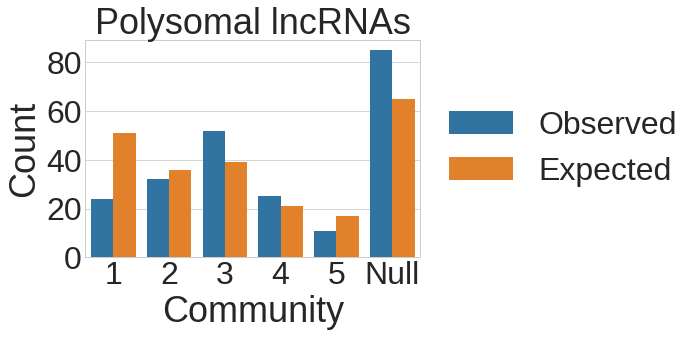

In [98]:
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 36
plt.rcParams['xtick.labelsize'] = 32
plt.rcParams['ytick.labelsize'] = 32
plt.rcParams['legend.fontsize'] = 32
plt.locator_params(axis='y', nbins=5)

sns.barplot(x='Community', y='Count', hue='Type', data=chi_sns)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Polysomal lncRNAs')
outfile = '/home/jessime/Research/pics/paper/polysomal.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
outfile = '/home/jessime/Research/pics/paper/polysomal.png'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [99]:
outfile = '/home/jessime/Research/papers/revisions/polysome.csv'
v7_in_v22.to_csv(outfile)

outfile = '/home/jessime/Research/papers/revisions/polysome_chi2_1.csv'
contingency.to_csv(outfile)

outfile = '/home/jessime/Research/papers/revisions/polysome_chi2_2.csv'
chi_sns.to_csv(outfile)

# Random seqs

**[R2C4]** 

> What is the result of applying the method to mRNAs? And to random sequences? 

In [7]:
%aimport fasta

In [102]:
!mkdir /home/jessime/Research/random

In [ ]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'

for i in range(1, 6):
    outfasta = f'/home/jessime/Research/random/v22_rand{i}_global.fa'
    rand_maker = fasta.RandomMaker(infasta, outfasta, k=i)
    rand_maker.synthesize_random()

In [ ]:
infasta = '/home/jessime/Research/M5_transcripts01.fa'

for i in range(1, 6):
    outfasta = f'/home/jessime/Research/random/M5_rand{i}_global.fa'
    rand_maker = fasta.RandomMaker(infasta, outfasta, k=i)
    rand_maker.synthesize_random()

In [8]:
%aimport kmer_counts

In [9]:
v22_names = '/home/jessime/Research/v22_names01B_pk.txt'
v22_names = pickle.load(open(v22_names, 'rb'))

M5_names = '/home/jessime/Research/M5_names01B_pk.txt'
M5_names = pickle.load(open(M5_names, 'rb'))

In [ ]:
for i in range(1, 6):
    infasta = f'/home/jessime/Research/random/v22_rand{i}_global.fa'
    outfile = f'/home/jessime/Research/random/v22_rand{i}_{i}mers.csv'
    maker = kmer_counts.BasicCounter(infasta, outfile, k=i, binary=False, label=True)
    maker.make_count_file(names=v22_names)
    
for i in range(1, 6):
    infasta = f'/home/jessime/Research/random/M5_rand{i}_global.fa'
    outfile = f'/home/jessime/Research/random/M5_rand{i}_{i}mers.csv'
    maker = kmer_counts.BasicCounter(infasta, outfile, k=i, binary=False, label=True)
    maker.make_count_file(names=M5_names)

In [17]:
for i in range(1, 6):
    cmd = (f'Rscript treeview_cluster.r '
           f'/home/jessime/Research/random/v22_rand{i}_{i}mers.csv '
           f'/home/jessime/Research/treeview/v22_rand{i}_{i}mers.gtr '
           f'/home/jessime/Research/treeview/v22_rand{i}_{i}mers.atr ' 
           f'/home/jessime/Research/treeview/v22_rand{i}_{i}mers.cdt ')
    print(sp.run(cmd.split()))

CompletedProcess(args=['Rscript', 'treeview_cluster.r', '/home/jessime/Research/random/v22_rand1_1mers.csv', '/home/jessime/Research/treeview/v22_rand1_1mers.gtr', '/home/jessime/Research/treeview/v22_rand1_1mers.atr', '/home/jessime/Research/treeview/v22_rand1_1mers.cdt'], returncode=0)
CompletedProcess(args=['Rscript', 'treeview_cluster.r', '/home/jessime/Research/random/v22_rand2_2mers.csv', '/home/jessime/Research/treeview/v22_rand2_2mers.gtr', '/home/jessime/Research/treeview/v22_rand2_2mers.atr', '/home/jessime/Research/treeview/v22_rand2_2mers.cdt'], returncode=0)
CompletedProcess(args=['Rscript', 'treeview_cluster.r', '/home/jessime/Research/random/v22_rand3_3mers.csv', '/home/jessime/Research/treeview/v22_rand3_3mers.gtr', '/home/jessime/Research/treeview/v22_rand3_3mers.atr', '/home/jessime/Research/treeview/v22_rand3_3mers.cdt'], returncode=0)
CompletedProcess(args=['Rscript', 'treeview_cluster.r', '/home/jessime/Research/random/v22_rand4_4mers.csv', '/home/jessime/Research/

Mauro wants 6mers too. I'm going to do that just with human (all the way through).

In [10]:
infasta = '/home/jessime/Desktop/v22_head_30k.fa'
outfasta = f'/home/jessime/Research/random/v22_rand6_global.fa'
rand_maker = fasta.RandomMaker(infasta, outfasta, k=6)
_ = rand_maker.synthesize_random()

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

In [12]:
infasta = f'/home/jessime/Research/random/v22_rand6_global.fa'
outfile = f'/home/jessime/Research/random/v22_rand6_6mers.csv'
maker = kmer_counts.BasicCounter(infasta, outfile, k=6, binary=False, label=True)
maker.make_count_file(names=v22_names[:15000])

HBox(children=(IntProgress(value=0, max=15000), HTML(value='')))

array([[-0.66013938, -0.6570704 ,  0.31119686, ...,  2.67038989,
        -0.41903532, -0.292483  ],
       [ 0.23053141, -0.6570704 ,  1.20067072, ..., -0.30952522,
        -0.41903532, -0.292483  ],
       [ 0.36726707,  0.03530711, -0.7971527 , ..., -0.30952522,
        -0.41903532, -0.292483  ],
       ..., 
       [ 0.1396329 ,  0.42087561,  0.09981384, ..., -0.30952522,
        -0.41903532,  1.3264426 ],
       [-0.34532592, -0.44491509, -0.26754484, ..., -0.30952522,
        -0.08155987, -0.292483  ],
       [ 0.32349801,  0.27876186, -0.2780109 , ..., -0.30952522,
         0.07717411,  0.17601383]], dtype=float32)

In [13]:
cmd = ('Rscript treeview_cluster.r '
       '/home/jessime/Research/random/v22_rand6_6mers.csv '
       '/home/jessime/Research/treeview/v22_rand6_6mers.gtr '
       '/home/jessime/Research/treeview/v22_rand6_6mers.atr ' 
       '/home/jessime/Research/treeview/v22_rand6_6mers.cdt ')
print(sp.run(cmd.split()))

CompletedProcess(args=['Rscript', 'treeview_cluster.r', '/home/jessime/Research/random/v22_rand6_6mers.csv', '/home/jessime/Research/treeview/v22_rand6_6mers.gtr', '/home/jessime/Research/treeview/v22_rand6_6mers.atr', '/home/jessime/Research/treeview/v22_rand6_6mers.cdt'], returncode=0)
